In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [22]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
num_classes = 8
baseMapNum = 32
weight_decay = 1e-4
IMG_SIZE = 28
#model
model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(baseMapNum, (3,3), padding='same', ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(baseMapNum, (5,5), padding='same', ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(2*baseMapNum, (3,3), padding='same',))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*baseMapNum, (5,5), padding='same', ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (5,5), padding='same', ))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(5*num_classes, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5*num_classes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [24]:
#preparing train data
x= pd.read_csv('../input/emotioo/dt.csv')
x.head()
x.shape
x.shape
final = x
final.head()

,196,195,195.1,198,197,200,210,193,146,102,65,44,42,43,43.1,45,44.1,60,96,151,193.1,202,191,190,192,191.1,191.2,190.1,197.1,195.2,195.3,195.4,205,195.5,130,60.1,31,30,33,38,...,111.6,125.10,136.6,140.6,155.6,106.6,53.5,54.2,58.4,64.1,57.1,32.1,41.6,36.5,40.8,38.7,88.1,106.7,93.4,82.2,82.3,80.7,64.2,53.6,66.2,87.4,110.7,122.6,122.7,125.11,130.6,144.7,141.7,63.3,53.7,49.1,51.3,65.2,64.3,6
0,195,196,198,198,197,194,196,206,202,184,147,119,99,90,90,90,108,132,163,192,202,193,188,189,190,189,188,188,193,195,198,199,196,205,194,142,81,49,33,30,...,99,120,134,141,140,72,52,48,74,117,166,40,41,44,109,123,112,105,100,96,90,78,69,67,74,85,101,119,132,138,141,148,141,65,53,56,61,51,58,1
1,198,199,198,197,197,202,213,200,167,114,75,54,46,46,45,46,54,77,117,167,202,206,195,194,195,194,194,194,199,200,197,195,203,197,135,67,34,28,31,34,...,93,116,132,138,143,137,65,59,54,68,64,43,44,42,41,52,110,117,109,101,94,88,71,58,61,73,93,118,134,140,139,135,149,102,50,56,50,60,70,2
2,16,38,57,54,63,71,74,84,97,91,81,71,70,78,90,91,83,68,59,58,59,60,68,71,52,34,31,41,28,42,49,56,67,89,103,110,105,96,101,109,...,87,82,70,59,49,58,63,58,68,54,60,173,158,84,142,153,146,141,147,149,152,160,155,145,139,126,109,95,84,73,65,59,45,61,70,61,64,60,58,4
3,10,22,41,48,51,51,59,73,76,79,88,103,117,114,123,138,141,144,141,162,147,127,119,131,118,135,104,75,15,33,48,48,53,59,64,68,72,83,94,103,...,152,145,130,118,108,105,77,63,51,36,29,47,70,85,86,83,87,84,86,80,83,95,108,116,128,138,148,154,148,134,119,103,90,81,76,53,30,33,36,3
4,91,91,91,88,70,66,76,91,108,132,162,165,159,161,153,148,143,128,119,86,70,75,69,86,109,111,107,106,92,91,90,79,65,66,95,134,149,156,165,173,...,133,137,118,89,79,69,68,68,69,80,95,106,109,105,106,102,99,89,73,65,66,69,70,68,74,97,96,108,124,101,80,70,68,70,72,67,72,91,112,4


In [25]:
#preparing test data
fin = pd.read_csv('../input/facerec/test.csv')
fin = fin.drop(columns=["Unnamed: 0"])
fin.head()
fin = x

In [26]:
#Train/ Fit the model on train data
Y = final["6"]
Y = np.array(Y)
for i in range(len(Y)):
    if Y[i]=='contempt':
        Y[i]=7
X = final.drop(columns=["6"])
X=X/255
Y = tf.keras.utils.to_categorical(Y,8)
X = np.array(X)
X = X.reshape(X.shape[0],28,28,1)
Y_v = fin["6"]
Y_v = np.array(Y_v)
for i in range(len(Y_v)):
    if Y_v[i]=='contempt':
        Y_v[i]=7
X_v = fin.drop(columns=["6"])
Y_v = tf.keras.utils.to_categorical(Y_v,8)
X_v = np.array(X_v)
X_v=X_v/255
X_v = X_v.reshape(X_v.shape[0],28,28,1)


In [27]:
x= pd.read_csv('../input/emotioo/dt.csv')
x.head()
x=x.drop(columns=["6"],axis=1)
x.shape
x=x/255
x = np.array(x)
x.shape

(13688, 784)

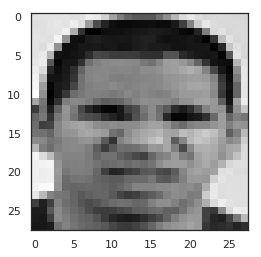

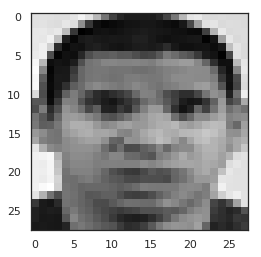

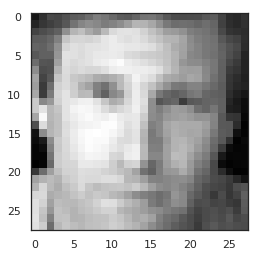

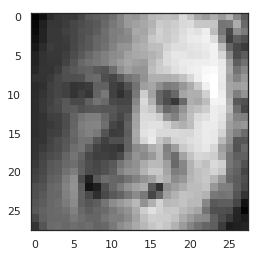

In [28]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(x[ix].reshape((28, 28)), interpolation='none', cmap='gray')
plt.show()

In [29]:

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=20,  
        zoom_range = 0.3, 
        width_shift_range=0.15,  
        height_shift_range=0.15,  
        horizontal_flip=True, 
        vertical_flip=False)  

datagen.fit(X)

In [30]:
history = model.fit_generator(datagen.flow(X, Y,batch_size= 512),
                    steps_per_epoch=30,
                    validation_data=(X_v, Y_v),
                    epochs = 25, verbose = 1)

Epoch 1/25
30/30 [==============================] - 12s 411ms/step - loss: 1.3094 - acc: 0.4711 - val_loss: 1.6160 - val_acc: 0.4628
Epoch 2/25
30/30 [==============================] - 8s 267ms/step - loss: 1.0602 - acc: 0.5092 - val_loss: 1.0228 - val_acc: 0.5611
Epoch 3/25
30/30 [==============================] - 8s 268ms/step - loss: 1.0288 - acc: 0.5427 - val_loss: 0.9309 - val_acc: 0.6085
Epoch 4/25
30/30 [==============================] - 8s 268ms/step - loss: 0.9530 - acc: 0.6076 - val_loss: 0.7942 - val_acc: 0.6973
Epoch 5/25
30/30 [==============================] - 8s 268ms/step - loss: 0.9002 - acc: 0.6638 - val_loss: 0.8758 - val_acc: 0.7098
Epoch 6/25
30/30 [==============================] - 8s 268ms/step - loss: 0.8154 - acc: 0.7103 - val_loss: 0.8638 - val_acc: 0.7135
Epoch 7/25
30/30 [==============================] - 8s 269ms/step - loss: 0.7925 - acc: 0.7278 - val_loss: 0.7115 - val_acc: 0.7560
Epoch 8/25
30/30 [==============================] - 8s 267ms/step - loss: 0

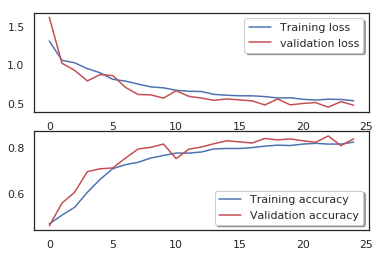

In [31]:
#import matplotlib.plt 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

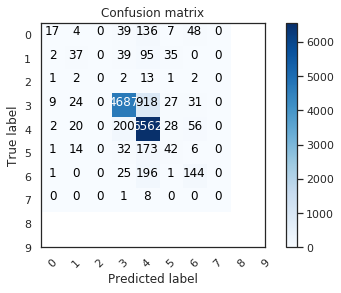

In [32]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_v)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_v,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [33]:
#Evaluating on test data
model.save('weights.h5')
pred= model.evaluate(X_v,Y_v)
print("On test data:")
print('Loss: ',pred[0])
acc = pred[1]*100
print('Accuracy: ',acc,"%")

13688/13688 [==============================] - 4s 289us/step
On test data:
Loss:  0.47971971114430073
Accuracy:  83.93483343074224 %


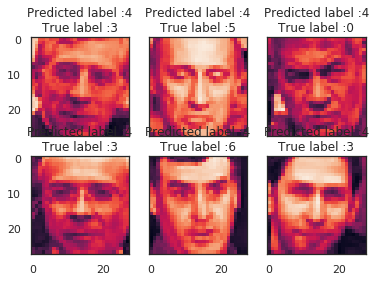

In [34]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_v[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            #plt.imshow((img_errors[error]).reshape((28, 28,1)), interpolation='none', cmap='gray')
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [35]:
test = pd.read_csv('../input/testsub/test.csv')
test.head()
imge = test['ID']
vals = test.drop(columns = ["ID"])
vals/=255
imge.head()
vals = np.array(vals)
vals = vals.reshape(vals.shape[0],28,28,1)
preds = model.predict(vals)
preds.shape
va = pd.DataFrame()
for i in range(263):
    mx =preds[i][0]
    ind = 0
    for j in range(8):
        if preds[i][j]>mx:
            mx = preds[i][j]
            ind = j
    if ind == 0:
        va=va.append(pd.DataFrame(['anger']))
    elif ind == 1:
        va=va.append(pd.DataFrame(['disgust']))
    elif ind == 2:
        va=va.append(pd.DataFrame(['fear']))
    elif ind == 3:
        va=va.append(pd.DataFrame(['happiness']))
    elif ind == 4:
        va=va.append(pd.DataFrame(['neutral']))
    elif ind == 5:
        va=va.append(pd.DataFrame(['sadness']))
    elif ind == 6:
        va=va.append(pd.DataFrame(['surprise']))
    else:
        va=va.append(pd.DataFrame(['contempt']))
va.head()
va = np.array(va)
#va.columns = ['Emotion']
va = pd.DataFrame(va)
va.head()
va.columns = ['Emotion']
imge = pd.DataFrame(imge)
imge.columns = ['Image']
va.head()
imge["Emotion"] = va
imge
imge.to_csv('SUBS.csv')

In [36]:
#Hurray!